Implemented models:
Linear regression
Logistic regression
Linear discriminant analysis
Principal component analysis
Perceptron




Machine learning models

1. Linear machine learning

2. Non linear machine learning

3. Ensemble machine learning


Statistical learning perspective frames data in the context of a hypothetical function that a machine learning algorithm is trying to learn.

Output is dependent or a function of the input or independent variables.

In computer science perspective, columns are features.

In statistics,

output = f(Input)

DependentVar = f(IndependentVar)

In Computer science,

OutputAttr = Program(InputAttr)

predicton = Program(Instance)

Difference between algorithm and model

Model = Algorithm(Data)

Supervised - Algorithm learns a mapping from input to output

Machine learning algorithms are described as learning a target function (f) that best maps input variables (X) to an output variable (Y)


Learning a function to make predictions

Y = f(X) - To learn the mapping Y = f(X) to make prediction of Y for new X. This is called predictive modelling

Learning mapping to learn more about the relationship in the data is called statistical inference.

Techniques for learning a function

Two main classes of machine learning :

1. Parametric - The mapping to know a functional form
2. Nonparametric - Can learn any mapping from inputs to outputs

Parametric -

Algorithms that simplify the function to known form are called parametric

A learning model that summarizes data with a set of parameters of fixed size is called parametric model.

The algorithm involve two steps -

1. Select a form for the function

2. Learn the coeficient for the function from the training data.

Some examples for parametric algorithm

Logistic algorithm

Linear Discriminant Analysis

Perceptron

Non parametric machine learning algorithms - Algorithms that do not make strong assumptions about the form of mapping function

Non parametric methods are good when we have a lot of data and no prior knowledge of the data

Some examples of non parametric model

Decision tree using CART and C4.5

Naive Bayes

Support vector machine

Neural Network



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import random
inputs = [0, 1]
weights = random.randint(-5,5)
bias1 = 0
bias2 = -1
weight1 = random.randint(-5,5)

from itertools import permutations

def permute(elements):
  return list(permutations(elements))

permute(inputs)

x = ((inputs[0]*weights) + (inputs[1]*weights)) - bias1

x1 = (x*weight1) - bias2

def outputsignal(x1):
  if x1 <= 0:
    return 0
  else:
    return 1

outputsignal(x1)

0

In [ ]:
#Linear regression
'''
y = wx + b
for error,
mean square error

Steps:
Training :
1. Initialize weights as zero
2. Initialize bias as zero
Given a data points
1. Predict result by using
  y = wx + b   1/1 + exp(-wx+b)
2. Calculate error
3. Use gradient descent to figure out new weight and bias values
4. Repeat n times
Testing
Given a data point
Put in the values from the data point into equation
y = wx + b
'''

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt


class linearRegression():

  def __init__(self, lr= 0.001, n_iters = 1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None


  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features) #Creating n zero weight array for n_features
    self.bias = 0

    for _ in range(self.n_iters):
      linear_pred = np.dot(X, self.weights) + self.bias

      dw = (1/n_samples) * np.dot(X.T, (linear_pred - y)) #Dot product include the summation part
      db = (1/n_samples) * np.sum(linear_pred - y)

      self.weights = self.weights - self.lr * dw
      self.bias = self.bias - self.lr * db

  def predict(self, X):
    linear_pred = np.dot(X, self.weights) + self.bias
    return linear_pred




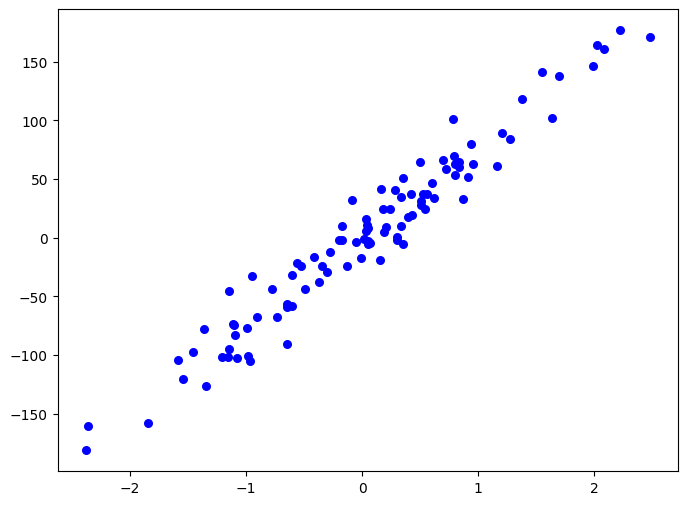

In [ ]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color="b", marker="o", s = 30)
plt.show()

In [ ]:
model = linearRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [ ]:
def mse(y_test, predict):
  return np.mean((y_test - predict) ** 2)

mse = mse(y_test, predict)
print(mse)

783.8155465125494


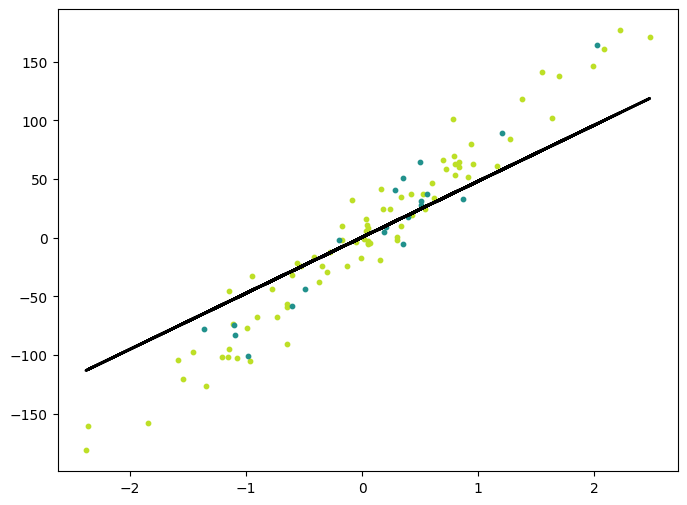

In [ ]:
y_pred_line = model.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='predictions')
plt.show()

In [ ]:
model = linearRegression(lr=0.01)
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [ ]:
def mse(y_test, predict):
  return np.mean((y_test - predict) ** 2)

mse = mse(y_test, predict)
print(mse)

305.7719958301902


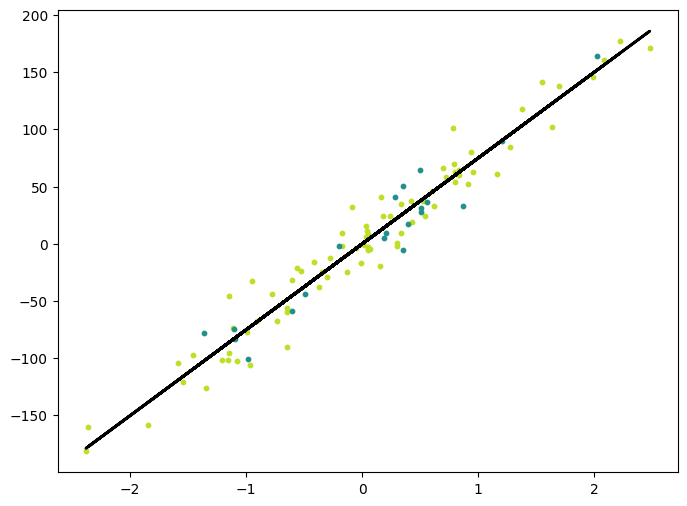

In [ ]:
y_pred_line = model.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='predictions')
plt.show()

Enter a learning rate: 0.2
305.77413162286416


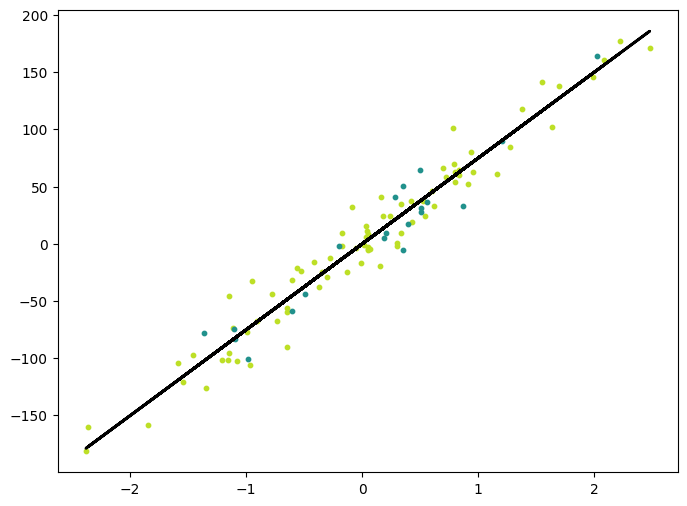

In [ ]:
n = float(input("Enter a learning rate: "))

model = linearRegression(lr=n)
model.fit(X_train, y_train)
predict = model.predict(X_test)
def mse(y_test, predict):
  return np.mean((y_test - predict) ** 2)

mse = mse(y_test, predict)
print(mse)

y_pred_line = model.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='predictions')
plt.show()

In [ ]:
#Logistic regression

'''
To create probability instead of specific value
We will put our predicted value in a sigmoid function that will give a probability distribution

y_predict = 1 / (1 + exp(-wx + b))

s(x) = 1 / 1 + exp(-x)
calculating error :
We calculate cross entropy
Entropy is impurity or randomness in the data.
For example, When we tossed a coin there is 0 entropy because there is no uncertainty at all
Cross entropy is also known as log loss
We will use gradient descent - Which direction we should go to minimize the cost
Updating weight and bias
w = w - alpha * dw
b = b - alpha * db

Steps :
Training :
1. Initialize weights as zero
2. Initialize bias as zero
Given a data points
1. Predict result by using
  y = 1 / 1 + exp(-wx+b)
2. Calculate error
3. Use gradient descent to figure out new weight and bias values
4. Repeat n times
Testing :
1. Put the values from the data point into equation
  y = 1 / 1 + exp(-wx+b)
2. Choose the label based on the probability
'''

In [ ]:
import numpy as np

def sigmoid(x):
  return 1 / (1 + np.exp(-x))


class LogisticRegression():

  def __init__(self, lr=0.001, n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None


  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    for _ in range(self.n_iters):
      linear_pred = np.dot(X, self.weights) + self.bias
      predictions = sigmoid(linear_pred)

      dw = (1/n_samples) * np.dot(X.T, (predictions - y))
      db = (1/n_samples) * np.sum((predictions - y))

      self.weights = self.weights - self.lr * dw
      self.bias = self.bias - self.lr * db

  def predict(self, X):
    linear_pred = np.dot(X, self.weights) + self.bias
    y_pred = sigmoid(linear_pred)
    class_pred = []
    for y in y_pred:
      if y <= 0.5:
        class_pred.append(0)
      else:
        class_pred.append(1)
    return class_pred


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

ds = datasets.load_breast_cancer()
X, y = ds.data, ds.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [ ]:
classf = LogisticRegression()
classf.fit(X_train, y_train)

<ipython-input-1-195c396ab9b0>:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [ ]:
y_pred = classf.predict(X_test)

<ipython-input-1-195c396ab9b0>:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [ ]:
def accuracy(y_pred, y_test):
  return np.sum(y_pred == y_test)/len(y_test)

acc = accuracy(y_pred, y_test)
print(acc)

0.8947368421052632


In [ ]:
classf = LogisticRegression(lr=0.01)
classf.fit(X_train, y_train)
y_pred = classf.predict(X_test)
acc = accuracy(y_pred, y_test)
print(acc)

0.9210526315789473


<ipython-input-1-195c396ab9b0>:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [ ]:
classf = LogisticRegression(lr=0.1)
classf.fit(X_train, y_train)
y_pred = classf.predict(X_test)
acc = accuracy(y_pred, y_test)
print(acc)

0.9210526315789473


<ipython-input-1-195c396ab9b0>:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [ ]:
#Linear discriminant analysis

'''
Linear discriminant is like PCA - It reduces the dimensions but it focuses on the maximizing separability among known categories
Reducing 2D to 1D graph :
LDA creates new axis according to the categories and then plot the data on the new axis for maximizing the separability

The new axis is created using two criteria (considered simultaneously) :
1. Maximize distance between two means
2. Minimize the variation (scatter) within each category

For two categories
(mean1 - mean2)** 2/ s1^2 - s2^2
Ideal condition -
Numerator -> large
Denominator -> small

For more than two categories
First we need to find the central point on a graph
Then calculate the distance between the central point and mean or main central point of each data

d1^2 + d2^2 + d3^2 / s1^2 + s2^2 + s3^2
Then maximize the distance between the main points and central point and minimize the scatter
'''

In [ ]:
#PCA principal component analysis
'''
PCA finds a new set of dimensions such that all the dimensions are orthogonal (linearly independent) and ranked according to the variance of data along them

Condition :
The transformed features are linearly independent
Dimensionality can be reduced by taking only the dimension with the highest importance
Those newly found dimensions should minimize the projection error
Projected points should have maximum spread

Variance
var(X) = (1/n_samples) * np.sum((x - mean) ** 2)

Covariance matrix
Cov(X, Y) = (1/n_samples) * np.sum((X - mean_x) * (Y - mean_Y).T)

Eigenvector and eigenvalue
The eigenvector point in the direction of the maximum variance and the corresponding eigevalues
indicates the importance of its corresponding eigenvector

Approach
Substract the mean from X
calculate Cov(X, X)
Calculate eigenvectors and eigenvalues of cov matrix
sort eigenvector according to their eigenvalues in decreasing order
choose first k eigenvectors and that will be the new dimensions
Transform the original n dimensional data points into k dimensions (=Projection with dot product)

'''


In [ ]:
import numpy as np


class PCA():

  def __init__(self, n_components):
    self.n_components = n_components
    self.components = None
    self.mean = None


  def fit(self, X):
    #Mean
    self.mean = np.mean(X, axis=0)
    X = X - self.mean

    #Covariance
    #Normal ndarray -> row : 1 sample and column : 1 feature
    cov = np.cov(X.T)  #To calculate covariance we need to tranpose the data
    #Eigenvector and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    #Sort eigenvectors according to eigenvalues in decreasing order
    eigenvectors = eigenvectors.T
    idx = np.argsort(eigenvalues)[::-1] #Reversing (For decreasing order) and sorting
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[idx]
    #select first n eigenvectors
    self.components = eigenvectors[0:self.n_components]

  def transform(self, X):
    X = X - self.mean
    return np.dot(X, self.components.T)




In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt

data = datasets.load_iris()
X = data.data
y = data.target


In [ ]:
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)


In [ ]:
X.shape

(150, 4)

In [ ]:
X_projected.shape

(150, 2)

In [ ]:
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

<ipython-input-9-996067a90dd0>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(x1, x2, c=y, edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('viridis', 3))


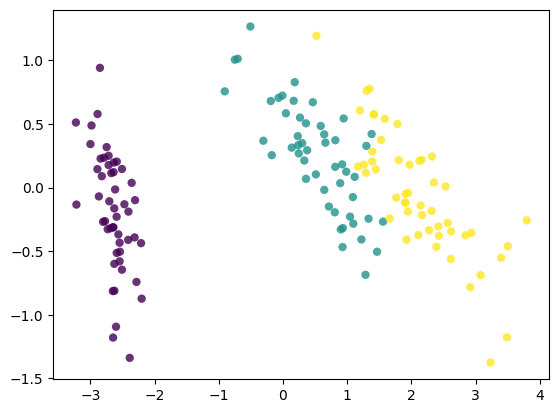

In [ ]:
plt.scatter(x1, x2, c=y, edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('viridis', 3))

In [ ]:
#Linear discriminant analysis
'''
Goal : Feature Reduction The goal is to project a dataset onto a lower dimensional space with good class-separability
LDA is supervised

Approach
1. Calculate S_B (Between class scatter)
2. Calculate S_W (Within class scatter)
3. Calculate the eigenvalues of S_W^-1.S_B
4. Sort eigenvectors according to their eigenvalues in decreasing order
5. Choose first k eigenvectors and this will be new k dimensions (linear discrimination)
6. Transform the original n dimensional into k dimensions
'''

In [ ]:
class LDA():

  def __init__(self, n_components):
    self.n_components = n_components
    self.components = None #to store eigenvector
    self.mean = None

  def fit(self, X, y):
    #include y because it is a supervised learning method
    n_features = X.shape[1]
    class_labels = np.unique(y)

    mean_overall = np.mean(X, axis=0)
    #Scatter between class and Scatter within class
    S_W = np.zeros((n_features, n_features))
    S_B = np.zeros((n_features, n_features))

    for c in class_labels:
      X_c = X[y == c]
      mean_c = np.mean(X_c, axis=0)

      S_W += (X_c - mean_c).T.dot(X_c - mean_c)

      n_c = X_c.shape[0]
      mean_diff = (mean_c - mean_overall).reshape(n_features, 1) #(4,) -> (4,1)
      S_B += n_c * (mean_diff).dot(mean_diff.T)

    A = np.linalg.inv(S_W).dot(S_B)

    #Eigenvalues of S_W^-1.S_B
    eigenvalues, eigenvectors = np.linalg.eig(A)
    eigenvectors = eigenvectors.T
    #Sort eigenvectors
    idx = np.argsort(abs(eigenvalues))[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[idx]

    #Choose first n vectors
    self.components = eigenvectors[0:self.n_components]


  def transform(self, X):
    return np.dot(X, self.components.T)



In [ ]:
data = datasets.load_iris()
X = data.data
y = data.target

lda = LDA(2)
lda.fit(X, y)
X_projected = lda.transform(X)

In [ ]:
X.shape

(150, 4)

In [ ]:
X_projected.shape

(150, 2)

In [ ]:
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

<ipython-input-20-996067a90dd0>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(x1, x2, c=y, edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('viridis', 3))


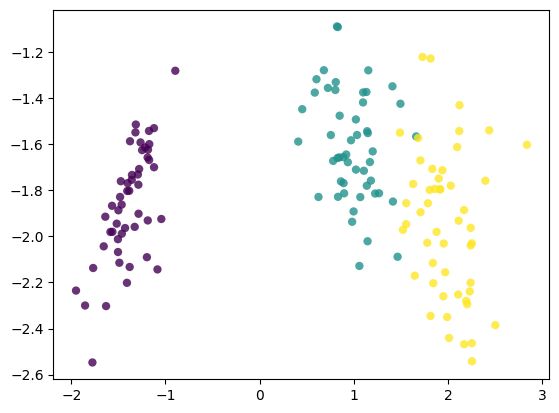

In [ ]:
plt.scatter(x1, x2, c=y, edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('viridis', 3))

In [ ]:
#Perceptron
'''
It is supervised algorithm for binary classification
It is a single layer neural network with a unit step function as a activation function

Inputs -> Weights -> Net input function -> Activation function -> output

Linear model

f(x) = w.T * x + b

Activation function is a unit step function
g(z) = 1 if z >= thershold function
    = 0  otherwise

Approximation
y = g(f(x)) = g(w.T * x + b)

Update rule
w = w + delta(w)
b = b + delta(b)

delta(w) = alpha * (actual_y - approximated_y) * x
delta(b) = alpha * (actual_y - approximated_y)

The weights are pushed towards positive or negative target class in case of misclassification

Steps :
Training (learn weights)
1. Initialize weights
2. For each sample :
  calculate approximation
  Apply update rule

prediction
1. Calculate approximation
'''

In [ ]:
import numpy as np

def unit_step(x):
  return np.where(x > 0, 1, 0)


class Perceptron:

  def __init__(self, learning_rate=0.01, n_iters=1000):
    self.lr = learning_rate
    self.n_iters = n_iters
    self.activation_func = unit_step
    self.weights = None
    self.bias = None


  def fit(self, X, y):
    n_samples, n_features = X.shape

    #Initiate the parameter
    self.weights = np.zeros(n_features)
    self.bias = 0

    y_= np.where(y>0, 1, 0)

    #Learning
    for _ in range(self.n_iters):
      for idx, x_i in enumerate(X):
        linear_output = np.dot(x_i, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)

        update = self.lr * (y_[idx] - y_predicted)
        self.weights += update * x_i
        self.bias ++ update


  def predict(self, X):
    linear_output = np.dot(X, self.weights) * self.bias
    y_predicted = self.activation_func(linear_output)
    return y_predicted



In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

X, y = datasets.make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
p = Perceptron(learning_rate=0.1, n_iters=1000)

In [ ]:
p.fit(X_train, y_train)

In [ ]:
predictions = p.predict(X_test)

In [ ]:
acc = accuracy(y_test, predictions)

In [ ]:
print(acc)

0.4666666666666667
